Load and look at the data

# Load

In [1]:
# Library used
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import Load_plot_data

In [2]:
data=np.load("Cellline1_Date190328_Chip2135.npz")
ids=data['ids']
times=data['times']
print(ids)
print(ids.shape)
print(times)
print(times.shape)
N= ids.shape[0]

[354 968 290 ... 464 555 911]
(963377,)
[1.6000000e-03 1.6500000e-03 1.7500000e-03 ... 8.9799495e+02 8.9799640e+02
 8.9799680e+02]
(963377,)


# Plot

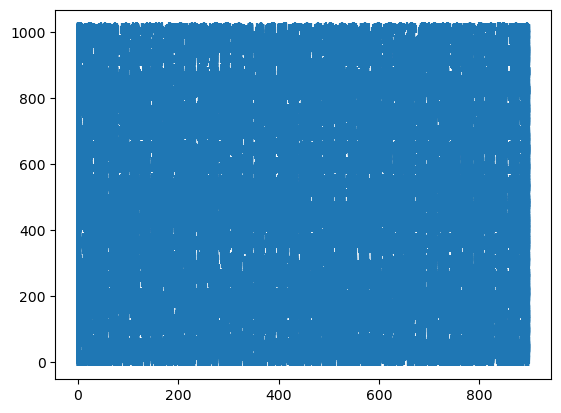

In [3]:
plt.scatter(times,ids,marker='|')

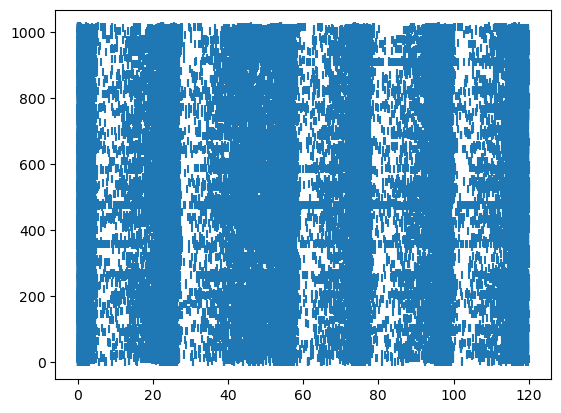

In [4]:
part_times=times[times<=120]
part_id=ids[times<=120]
plt.scatter(part_times,part_id,marker='|')

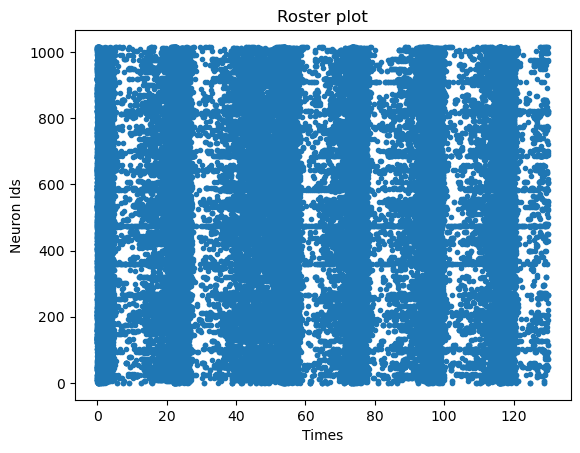

In [3]:
ids,times=Load_plot_data.load_neuron_data('Cellline1_Date190328_Chip2135.npz')
Load_plot_data.roster_plot(ids,times,130,'.')

### Histogram on the used data

1016
353


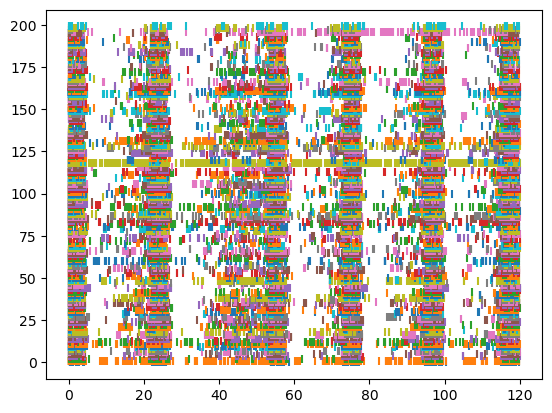

In [3]:
ids,times=Load_plot_data.load_neuron_data('Cellline1_Date190328_Chip2135.npz')
N=np.max(ids) # Number of neurons
Yspike0=[]
for i in range(N):
    Yspike0.append(times[ids==i])
print(len(Yspike0))

#Reduce the dataset (only one trial)
N=200
timemax=120

#Yspike=Yspike[0][:N] #keep only n first neuron

#seed
random.seed(25) #neuron choice

#keep n most actives
Yspike=sorted(Yspike0,key=lambda x:x.shape[0],reverse=True)[:3*N]
print(Yspike[-1].shape[0])
random.shuffle(Yspike) #There is a problem when just the N first are taken (not semidefinite positive qsigma)
Yspike=Yspike[:N]

for i in range(N):  #reduce the time
    Yspike[i]=Yspike[i][Yspike[i]<=timemax]
    plt.scatter(Yspike[i],i*np.ones(Yspike[i].shape[0]),marker='|')
plt.show()

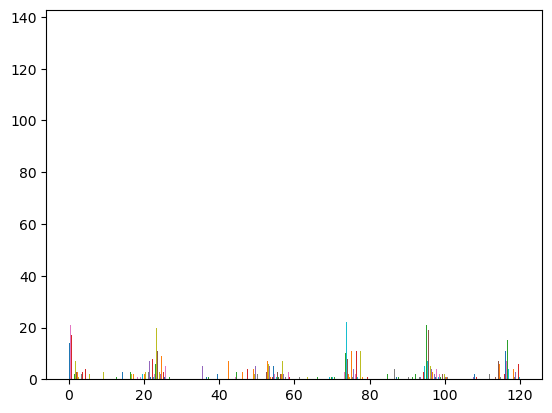

In [6]:
plt.hist(Yspike,bins=120,histtype='bar')
plt.show()

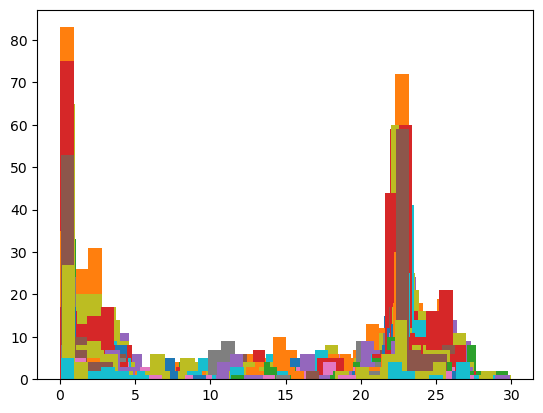

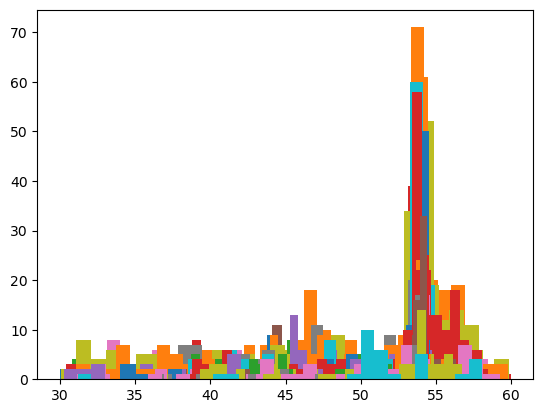

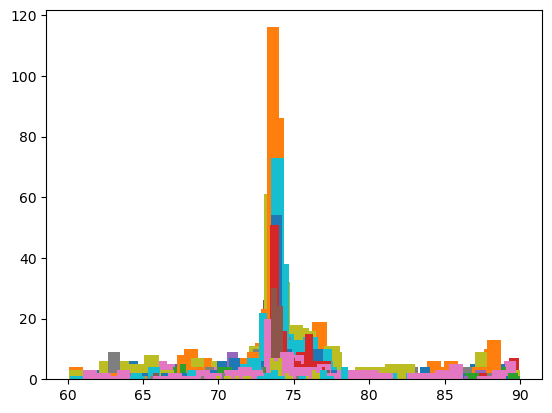

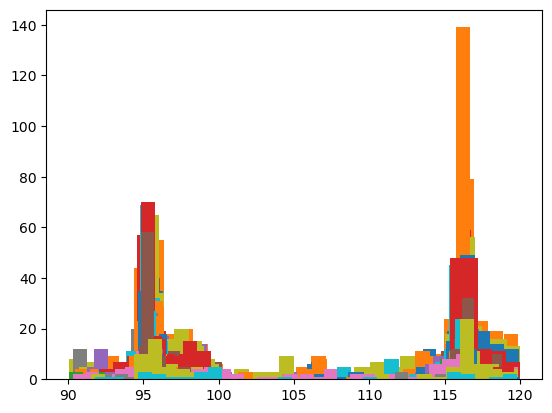

In [22]:
for t in [30,60,90,120]:
    for i in range(N):  #reduce the time
        Yspikeplt=Yspike[i][Yspike[i]<=t] 
        Yspikeplt=Yspikeplt[Yspikeplt>=t-30]
        plt.hist(Yspikeplt,bins=30)
    plt.show()

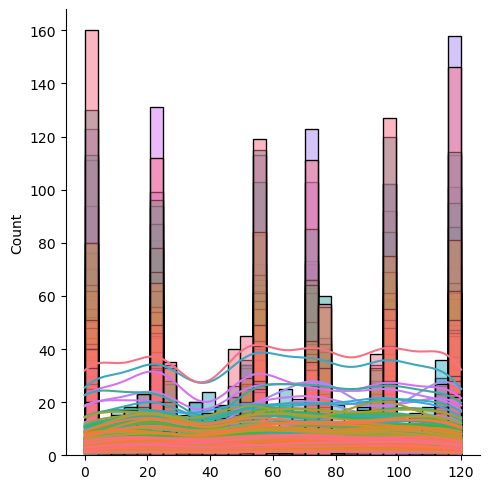

In [31]:
sns.displot(Yspike,kde=True,legend=False)

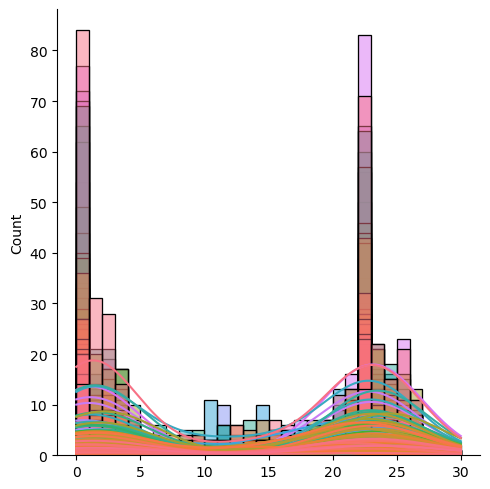

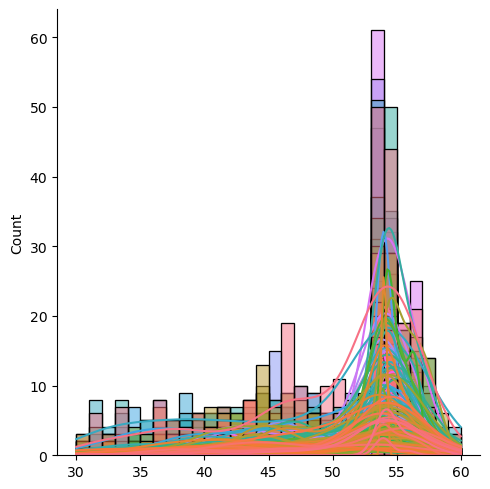

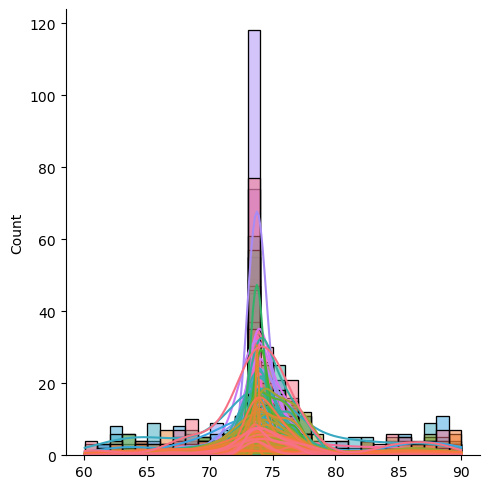

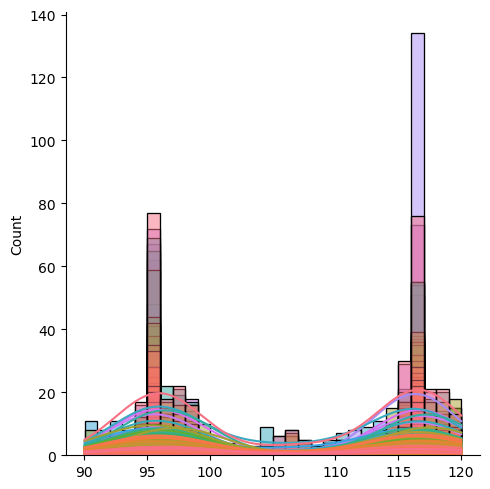

In [4]:
for t in [30,60,90,120]:
    Yspikeplt=[]
    for i in range(N):  #reduce the time
        Yspiketemp=Yspike[i][Yspike[i]<=t] 
        Yspikeplt.append(Yspiketemp[Yspiketemp>=t-30])
    sns.displot(Yspikeplt,bins=30,kde=True,legend=False)

In [10]:
Yspikesorted=sorted(Yspike0,key=lambda x:x.shape[0],reverse=True)
for i in range(N):  #reduce the time
    Yspikesorted[i]=Yspikesorted[i][Yspikesorted[i]<=timemax]

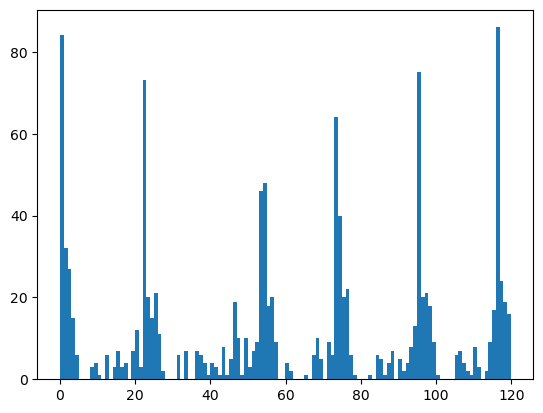

In [11]:
plt.hist(Yspikesorted[0],bins=120) #not necessarly appears in the dataset we use
plt.show()